In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
from ase import Atoms
from ase.io import read,write

In [3]:
ll_list = [0.1, 0.5, 0.8, 0.9, 0.95, 0.98, 0.99, 0.995]

In [4]:
ll_list.reverse()

In [5]:
cc_list = [4.5, 5.5]

In [6]:
lc = {}
for cc in cc_list:
    # cutoff lambda e_mae e_rmse f_mae f_rmse q_mae q_rmse
    lc[cc] = np.genfromtxt('r'+str(cc)+'-lc.dat')

In [7]:
sr_lc = {}
for cc in cc_list:
    # cutoff lambda e_mae e_rmse f_mae f_rmse
    sr_lc[cc] = np.genfromtxt('r'+str(cc)+'-sr-lc.dat')

In [8]:
mp_lc = {}
for cc in [4.5]:
    # cutoff lambda e_mae e_rmse f_mae f_rmse
    mp_lc[cc] = np.genfromtxt('r'+str(cc)+'-mp1-lc.dat')

In [9]:
mp_sr_lc = {}
for cc in [4.5]:
    # cutoff lambda e_mae e_rmse f_mae f_rmse
    mp_sr_lc[cc] = np.genfromtxt('r'+str(cc)+'-mp1-sr-lc.dat')

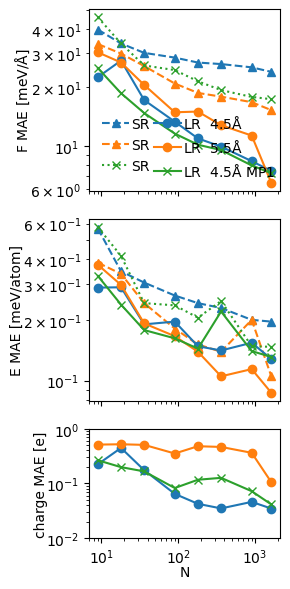

In [10]:
fig, axs = plt.subplots(3, 1, figsize=(3., 6), sharex=True, height_ratios=[1,1,0.6])

ax = axs[0]
for i, cc in enumerate(cc_list):
    lc_now = sr_lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,3]*1000, '^--',
            c=cm.tab10(i),
            label='SR')

for i, cc in enumerate([4.5]):    
    lc_now = mp_sr_lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,3]*1000, 'x', ls='dotted',
            c=cm.tab10(2),
            label='SR')
    
for i, cc in enumerate(cc_list):    
    lc_now = lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,3]*1000, 'o-',
            c=cm.tab10(i),
            label='LR  '+str(cc)+'$\mathrm{\AA}$')
    

for i, cc in enumerate([4.5]):    
    lc_now = mp_lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,3]*1000, 'x', ls='-',
            c=cm.tab10(2),
            label='LR  '+str(cc)+'$\mathrm{\AA}$ MP1')


    
ax.loglog()
ax.legend(ncol=2, frameon=False, fontsize=10,  columnspacing=0.3, handletextpad=0.1)

#ax.set_xlabel('N')
ax.set_ylabel('F MAE [meV/$\mathrm{\AA}$]',labelpad=-1)

ax = axs[1]
for i, cc in enumerate(cc_list):
    lc_now = sr_lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,1]*1000, '^--',
            c=cm.tab10(i),
            label='SR')
    
for i, cc in enumerate(cc_list):    
    lc_now = lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,1]*1000, 'o-',
            c=cm.tab10(i),
            label='LR $r_\mathrm{cut}=$'+str(cc))

for i, cc in enumerate([4.5]):    
    lc_now = mp_lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,1]*1000, 'x', ls='-',
            c=cm.tab10(2),
            label='LR  '+str(cc)+'$\mathrm{\AA}$ MP1')

for i, cc in enumerate([4.5]):    
    lc_now = mp_sr_lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,1]*1000, 'x', ls='dotted',
            c=cm.tab10(2),
            label='LR  '+str(cc)+'$\mathrm{\AA}$ SR MP1')
    
ax.loglog()
#ax.legend(ncol=2, frameon=False)

#ax.set_xlabel('N')
ax.set_ylabel('E MAE [meV/atom]',labelpad=-1)

ax = axs[2]
    
for i, cc in enumerate(cc_list):    
    lc_now = lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,5], 'o-',
            c=cm.tab10(i),
            label='LR $r_\mathrm{cut}=$'+str(cc))
    
for i, cc in enumerate([4.5]): 
    lc_now = mp_lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,5], 'x', ls='-',
            c=cm.tab10(2),
            label='LR $r_\mathrm{cut}=$'+str(cc))
    
ax.loglog()
ax.set_ylim([0.01,1])
#ax.legend(ncol=2, frameon=False)

ax.set_xlabel('N',labelpad=-1)
ax.set_ylabel('charge MAE [e]',labelpad=-1)

fig.tight_layout()

fig.savefig('electrolyte_lc.pdf', dpi=300)

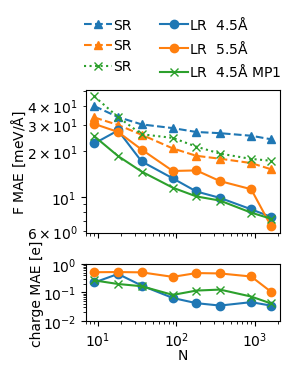

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(3., 4), sharex=True, height_ratios=[1,0.4])

ax = axs[0]
for i, cc in enumerate(cc_list):
    lc_now = sr_lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,3]*1000, '^--',
            c=cm.tab10(i),
            label='SR')

for i, cc in enumerate([4.5]):    
    lc_now = mp_sr_lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,3]*1000, 'x', ls='dotted',
            c=cm.tab10(2),
            label='SR')
    
for i, cc in enumerate(cc_list):    
    lc_now = lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,3]*1000, 'o-',
            c=cm.tab10(i),
            label='LR  '+str(cc)+'$\mathrm{\AA}$')
    

for i, cc in enumerate([4.5]):    
    lc_now = mp_lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,3]*1000, 'x', ls='-',
            c=cm.tab10(2),
            label='LR  '+str(cc)+'$\mathrm{\AA}$ MP1')


    
ax.loglog()
ax.legend(ncol=2, 
          frameon=False, 
          fontsize=10,  
          #columnspacing=0.3, 
          handletextpad=0.1,
         bbox_to_anchor=(0.5, 1.3), loc='center')

#ax.set_xlabel('N')
ax.set_ylabel('F MAE [meV/$\mathrm{\AA}$]',labelpad=-1)

ax = axs[1]
    
for i, cc in enumerate(cc_list):    
    lc_now = lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,5], 'o-',
            c=cm.tab10(i),
            label='LR $r_\mathrm{cut}=$'+str(cc))
    
for i, cc in enumerate([4.5]): 
    lc_now = mp_lc[cc]
    ax.plot(lc_now[:,0]*1809, lc_now[:,5], 'x', ls='-',
            c=cm.tab10(2),
            label='LR $r_\mathrm{cut}=$'+str(cc))
    
ax.loglog()
ax.set_ylim([0.01,1])
#ax.legend(ncol=2, frameon=False)

ax.set_xlabel('N',labelpad=-1)
ax.set_ylabel('charge MAE [e]',labelpad=-1)

fig.tight_layout()

fig.savefig('electrolyte_lc.pdf', dpi=300)

In [12]:
q_all = {}
q_ref_all = {}
for cc in cc_list:
    q_all[cc] = {}
    q_ref_all[cc] = {}
    for ll in ll_list:
        #q_all[cc][ll] = []
        #q_ref_all[cc][ll] = []
        xyz = read('fit-only-electrolyte-r'+str(cc)+'-lc-'+str(ll)+'/q-noPt.xyz',':-2')
        q_all[cc][ll]= np.hstack([ x.arrays['q'] /9.4893 for x in xyz])
        q_ref_all[cc][ll] = np.hstack([ x.arrays['q_ref']for x in xyz])
        if (np.mean(q_all[cc][ll] * q_ref_all[cc][ll]) < 0):
            q_all[cc][ll] *= -1
        #print(cc, ll, np.mean(q_all[cc][ll] * q_full)/np.mean(q_full * q_full))

In [13]:
ll_list

[0.995, 0.99, 0.98, 0.95, 0.9, 0.8, 0.5, 0.1]

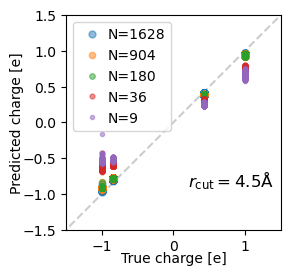

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))


cc=4.5
ax.plot(np.array([-2,2]), np.array([-2,2]),'k--',alpha=0.2)
list_l = [0.995, 0.98, 0.9, 0.5, 0.1]
for i,ll in enumerate(list_l[::-1]):
    nn = int(1809*(1.-ll)+0.0001)
    ax.plot(q_ref_all[cc][ll], q_all[cc][ll], '.', label='N='+str(nn),rasterized=True, ms=10-i*1, alpha=0.5)
    
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])

ax.set_box_aspect(1)

ax.set_xlabel('True charge [e]',labelpad=-1)
ax.set_ylabel('Predicted charge [e]',labelpad=-1)

ax.legend(#bbox_to_anchor=(0.91, 0.9), 
    labelspacing = 0.5,
          fontsize=10,
          columnspacing=0.3, handletextpad=0.1, frameon=True, ncol=1)

ax.text(0.2, -0.9, '$r_\mathrm{cut}=4.5\mathrm{\AA}$', fontsize=12)

fig.tight_layout()

fig.savefig('electrolyte_q.pdf', dpi=300)